Acá tenemos 4 parámetros: $p_0$, $r_s$ y $\beta_m$ que debemos verificar si varían según el redshift y en qué medida. Llamaremos $A_{(p_0, r_s, \beta_m)}$ a las pendientes de cada una y $B_{(p_0, r_s, \beta_m)}$ a sus interceptos. 

Primero cargamos todo:

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import h5py
from scipy.optimize import curve_fit

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
minsnap = 10
maxsnap = 92

snapList = np.arange(minsnap, maxsnap+1, dtype=np.int32)
nscales = len(snapList)

fin = h5py.File("RPfits.h5", "r")

p0, rs, bm = np.zeros(nscales), np.zeros(nscales), np.zeros(nscales)
dp0, drs, dbm = np.zeros(nscales), np.zeros(nscales), np.zeros(nscales)
scales = np.zeros(nscales)
redshifts = np.zeros(nscales)

for s in snapList:
    gr = str(s)
    i = s-minsnap
    
    p0[i], rs[i], bm[i] = fin[gr+'/params']
    
    dp0[i] = fin[gr+'/cov_mtx'][0,0]**0.5
    drs[i] = fin[gr+'/cov_mtx'][1,1]**0.5
    dbm[i] = fin[gr+'/cov_mtx'][2,2]**0.5
    
    scales[i] = fin[gr].attrs['scale']
    redshifts[i] = fin[gr].attrs['redshift']
    
fin.close()

Grafiquemos cada set de curvas:


(0.05, 1.05)

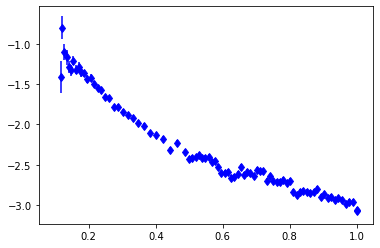

In [3]:
### p_0
pl.figure()
pl.errorbar(scales, p0, yerr=dp0, fmt='bd')
pl.xlim((0.05,1.05))

(0.1, 1.1)

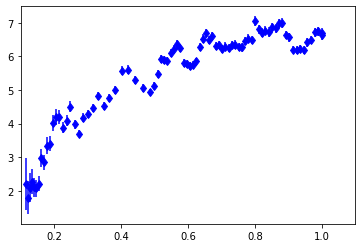

In [4]:
### r_s
pl.figure()
pl.errorbar(scales, rs, yerr=drs, fmt='bd')
pl.xlim((0.1,1.1))

(0.1, 1.1)

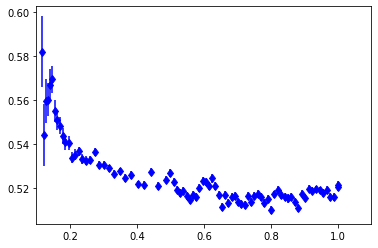

In [5]:
### beta
pl.figure()
pl.errorbar(scales, bm, yerr=dbm, fmt='bd')
pl.xlim((0.1,1.1))

Probamos varias funciones para ajustar estos comportamientos, principalmente tipo leyes de potencia

In [6]:
def power_law(x, a, b, c):
    return a*(x)**b + c

def exp_simple(x, a, b, c):
    return b*np.exp(a*x) + c

def power_law2(x, a1, a2, a3):
    return a1/x**a2+ a3

def log_simple(x, a, b):
    return b*np.log(a*x)

def lin(x, m, n):
    return m*x+n

In [7]:
par_p0, cov_p0 = curve_fit(power_law2, scales, p0, sigma=dp0, bounds=[[0,0,-10],[10,1,10]])
par_p0_lin, cov_p0_lin = curve_fit(lin, scales, p0, sigma=dp0)

In [8]:
print("Params :", par_p0)
print("Cov_mtx:", cov_p0)

Params : [  7.03006192   0.12200741 -10.        ]
Cov_mtx: [[ 9.12152485e+00 -1.43334724e-01 -9.14899109e+00]
 [-1.43334724e-01  2.25425949e-03  1.43756794e-01]
 [-9.14899109e+00  1.43756794e-01  9.17662067e+00]]


(0.1, 1.1)

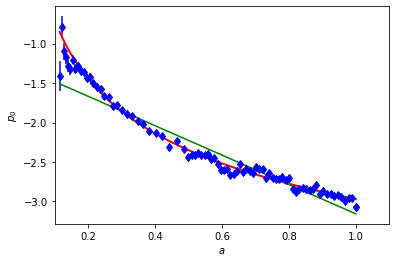

In [9]:
### p_0
pl.figure()
pl.errorbar(scales, p0, yerr=dp0, fmt='bd')
#pl.plot(scales, exp_simple(scales, *par_p0), 'r-', lw=2)
pl.plot(scales, power_law2(scales, *par_p0), 'r-', lw=2)
pl.plot(scales, lin(scales, *par_p0_lin), 'g-')
pl.ylabel(r'$p_0$')
pl.xlabel(r'$a$')
pl.xlim((0.1,1.1))

In [10]:
par_rs_lin, cov_rs_lin = curve_fit(lin, scales, rs, sigma=drs)
par_rs, cov_rs = curve_fit(power_law2, scales, rs, sigma=drs)

In [11]:
print("Params :", par_rs)
print("Cov_mtx:", cov_rs)

Params : [-3.46565881  0.42533252 10.26577178]
Cov_mtx: [[ 1.98921586  0.17458781 -2.06197363]
 [ 0.17458781  0.01544643 -0.18061049]
 [-2.06197363 -0.18061049  2.13965206]]


(0.1, 1.1)

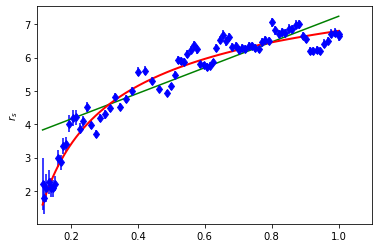

In [12]:
### r_s
pl.figure()
pl.errorbar(scales, rs, yerr=drs, fmt='bd')
pl.plot(scales, lin(scales, *par_rs_lin), 'g-')
pl.plot(scales, power_law2(scales, *par_rs), 'r-', lw=2)
#pl.plot(scales, log_simple(scales, *par_rs), 'r-', lw=2)
#pl.plot(scales, testfunc(scales, *par_rs), 'r-', lw=2)
#pl.plot(scales, log_simple(scales, 30.2,  2.1,  0.448), 'r-', lw=1.5)
pl.ylabel(r'$r_s$')
pl.xlim((0.1,1.1))

In [13]:
par_bm_lin, cov_bm_lin = curve_fit(lin, scales, bm, sigma=dbm)
par_bm, cov_bm = curve_fit(power_law2, scales, bm, sigma=dbm)

In [14]:
print("Params :", par_bm)
print("Cov_mtx:", cov_bm)

Params : [0.00336064 1.33473308 0.51219112]
Cov_mtx: [[ 1.36748049e-06 -2.16759425e-04 -1.85392602e-06]
 [-2.16759425e-04  3.51621670e-02  2.87994218e-04]
 [-1.85392602e-06  2.87994218e-04  2.68025823e-06]]


(0.1, 1.1)

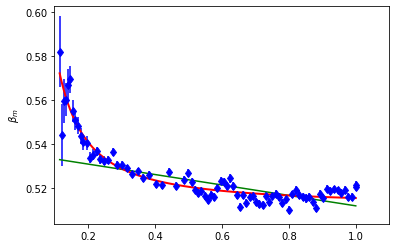

In [15]:
### beta
pl.figure()
pl.errorbar(scales, bm, yerr=dbm, fmt='bd')
pl.plot(scales, lin(scales, *par_bm_lin), 'g-')
pl.plot(scales, power_law2(scales, *par_bm), 'r-', lw=2)
pl.ylabel(r'$\beta_m$')
pl.xlim((0.1,1.1))

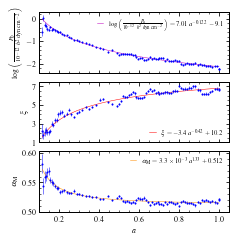

In [21]:
# Grafico para el paper de RP:

import matplotlib as mpl

def set_style(style='book', Hratio=1.0, Wfrac=1.0):
    if style == 'mnras':
        size, fsize = 3.32, 8
    if style == 'mnras-fw':
        size, fsize = 6.97, 8

    mpl.rcParams['figure.figsize'] = (size*Wfrac, (size*Wfrac)*Hratio)
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Times', 'Liberation Serif', 'Times New Roman']
    mpl.rcParams['font.size'] = fsize
    mpl.rcParams['legend.fontsize'] = 'medium'
    mpl.rcParams['legend.frameon'] = False
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['axes.linewidth'] = 1.0
    try:
        mpl.rcParams['xtick.minor.visible'] = True
        mpl.rcParams['ytick.minor.visible'] = True
    except: pass
    try:
        mpl.rcParams['xtick.top'] = True
        mpl.rcParams['ytick.right'] = True
    except: pass
    try:
        mpl.rcParams['xtick.direction'] = 'in'
        mpl.rcParams['ytick.direction'] = 'in'
    except: pass

set_style('mnras', Hratio=1.0, Wfrac=1)

fig, axs = pl.subplots(ncols=1, nrows=3, sharex=True)


un_corr = np.log10(6.7699)

axs[0].errorbar(scales, p0+un_corr, yerr=dp0, fmt='bo', ms=1, capsize=0, elinewidth=0.5)
axs[0].plot(scales, power_law2(scales, par_p0[0], par_p0[1], par_p0[2]+un_corr), 'm-', lw=0.5, 
            label=r"$\log\left(\frac{P_0}{10^{-12}\;h^2\;{\rm dyn}\;{\rm cm}^{-2}}\right) = 7.01\,a^{-0.122} - 9.1$")
#            label=r"$\log (P_0) = 7.01\,a^{-0.122} - 9.1$")
axs[0].set_ylabel(r'$\log\left(\frac{P_0}{10^{-12}\;h^2\;{\rm dyn}\;{\rm cm}^{-2}}\right)$')

#axs[0].set_yticks((-3.0,-2.0,-1.0))
axs[0].set_xlim((0.1,1.05))
axs[0].legend(loc="upper right", fontsize='small', handlelength=1)

axs[1].errorbar(scales, rs, yerr=drs, fmt='bo', ms=1, capsize=0, elinewidth=0.5)
axs[1].plot(scales, power_law2(scales, *par_rs), 'r-', lw=0.5,
           label=r"$\xi = -3.4\,a^{-0.42} + 10.2$")
axs[1].set_ylabel(r'$\xi$')
axs[1].set_yticks((1.0,3.0,5.0,7.0))
axs[1].set_xlim((0.1,1.05))
axs[1].legend(loc="lower right", fontsize='small', handlelength=1)

axs[2].errorbar(scales, bm, yerr=dbm, fmt='bo', ms=1, capsize=0, elinewidth=0.5)
axs[2].plot(scales, power_law2(scales, *par_bm), '-', c='darkorange', lw=0.5,
           label=r"$\alpha_{\rm M} = 3.3\times 10^{-3}\,a^{1.33} + 0.512$")
axs[2].set_ylabel(r'$\alpha_{\rm M}$')
axs[2].set_yticks((0.50, 0.55, 0.60))
axs[2].set_xlim((0.1,1.05))
axs[2].legend(loc="upper right", fontsize='small', handlelength=1)

axs[2].set_xlabel(r"$a$")

fig.tight_layout()
fig.subplots_adjust(hspace=0.15)
fig.savefig("paper/params_evol_cgs.eps")